In [1]:
import numpy as np
import scipy.stats as scs
import math
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=12)
matplotlib.rcParams['savefig.dpi'] = 1200

from utils_adaptive import run_adaptive
%load_ext autoreload
%autoreload 2

## Generate histograms

In [2]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * variance, mu + 3 * variance, 100)

In [3]:
N = 500; T_max = 10; T = T_max
tau = 1; fs_pct = 0.1; t0 = 3; 
num_mc = 1000
sim_sigma = 1.
prec_thres = 1. * N / sim_sigma ** 2

In [4]:
out = run_adaptive(tau, fs_pct=fs_pct, num_mc=num_mc, N=N, T_max=T_max, 
                   t0=t0, adaptive=True, prec_thres=prec_thres, print_out=False, sigma=sim_sigma, dp_scale_N=5)

out_df = pd.DataFrame(out)
print(np.mean(out_df["tau_adaptive"]**2), np.mean(out_df["tau_bm"]**2), np.mean(out_df["tau_oracle"]**2), np.mean(out_df["tau_oracle_alt"]**2))


/Users/ruoxuanxiong/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
0.0013202164009797751 0.0017432717186711764 0.0011727874819595524 0.0013331659867786376


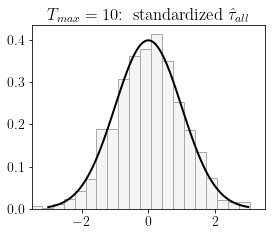

In [5]:
fig = plt.figure(figsize=(4,3.5))
plt.xlim([-3.5, 3.5])
plt.hist(out_df['tau_err_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T_{max}="+str(T)+"\mathrm{:\ standardized\ }\\hat{\\tau}_{all}$")
plt.tight_layout()
plt.savefig("../result/simulation/tau_T_"+str(T)+"_adaptive.pdf")

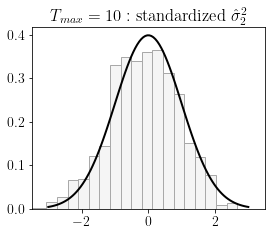

In [6]:
fig = plt.figure(figsize=(4,3.5))
plt.xlim([-3.5, 3.5])
plt.hist(out_df['sigma_err_2_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T_{max}="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}_2^2$")
plt.tight_layout()
plt.savefig("../result/simulation/sigma_2_T_"+str(T)+"_adaptive.pdf")

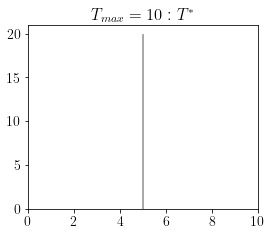

In [7]:
fig = plt.figure(figsize=(4,3.5))
plt.hist(out_df['T_ast'], bins=20, color="whitesmoke", edgecolor="darkgrey", density=True)
plt.xlim([0, T_max])
plt.title("$T_{max}="+str(T)+": T^{\\ast}$")
plt.tight_layout()
plt.savefig("../result/simulation/T_ast_adaptive.pdf")

## Generate table

In [8]:
N = 500; T_max = 10; T = T_max
tau = 1; fs_pct = 0.1; t0 = 3; 
num_mc = 1000
sim_sigma = 1.
prec_thres = 1. * N / sim_sigma ** 2
result = list()
out_dict = dict()

In [9]:
T_max_list = [5,10,15,20,25,30,35]
for T_max in T_max_list:
    T = T_max
    print(T_max)
    out = run_adaptive(tau, fs_pct=fs_pct, num_mc=num_mc, N=N, T_max=T_max, 
                   t0=t0, adaptive=True, prec_thres=prec_thres, print_out=False, sigma=sim_sigma, dp_scale_N=5)
    out_df = pd.DataFrame(out)
    out_dict[T_max] = out
    result.append([T, np.mean(out_df['tau_err_std']**2), 
      np.mean(out_df['sigma_err_2_std']**2), 
      np.mean(out_df['tau_err_std']*out_df['sigma_err_2_std'])])

5


/Users/ruoxuanxiong/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
10
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
15
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
20
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
25
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 

In [10]:
pd.DataFrame(result).round(decimals=3).to_latex("../result/simulation/theorem-4-1-table.tex")

In [11]:
save_path = "../result/simulation/result_summary.pkl"
with open(save_path, 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

<ipython-input-12-ae87947a5921>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,3.5))


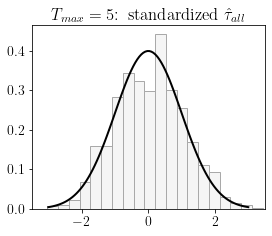

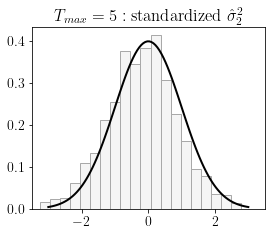

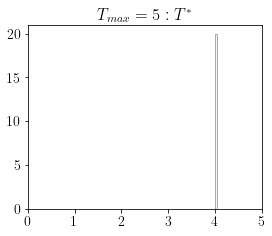

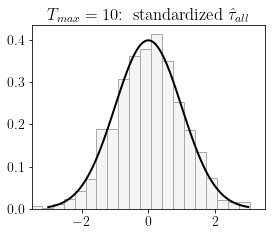

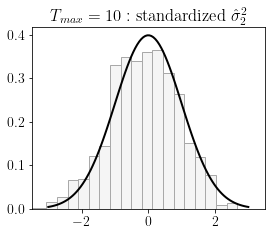

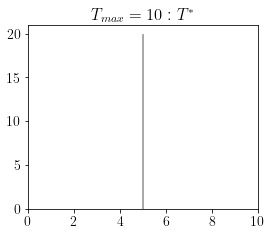

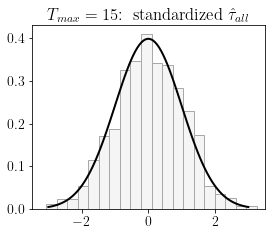

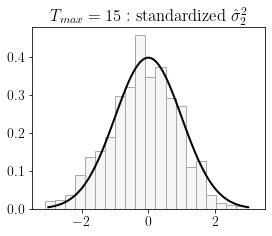

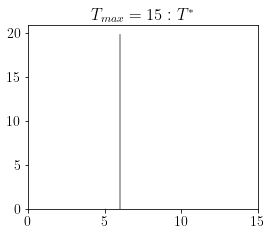

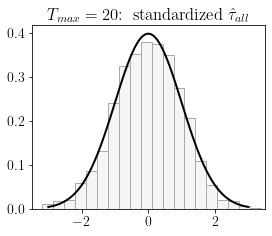

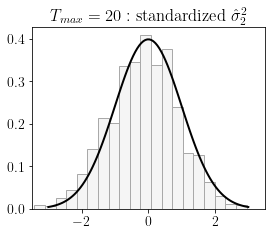

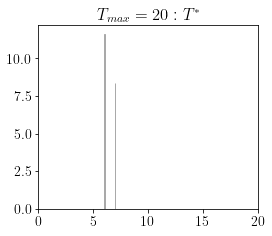

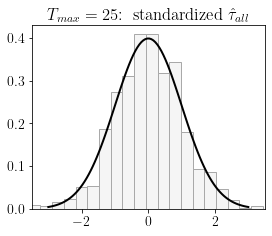

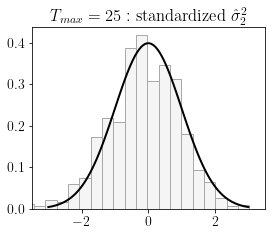

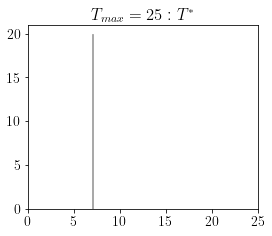

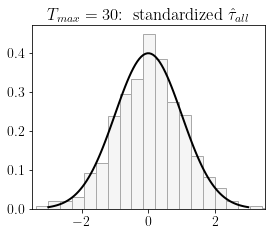

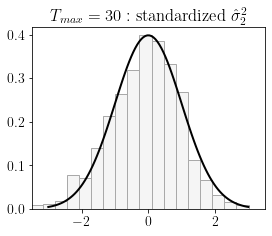

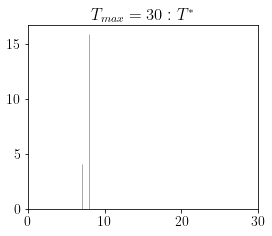

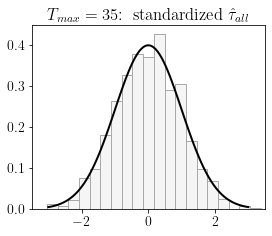

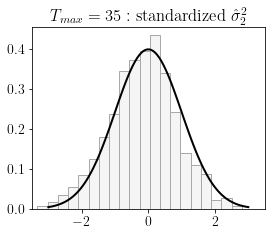

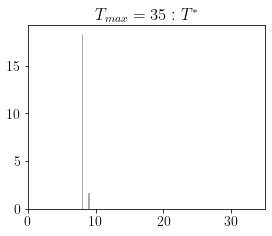

In [12]:
for T_max in T_max_list:
    
    out_df = pd.DataFrame(out_dict[T_max])
    T = T_max
    fig = plt.figure(figsize=(4,3.5))
    plt.xlim([-3.5, 3.5])
    plt.hist(out_df['tau_err_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
    plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
    plt.title("$T_{max}="+str(T)+"\mathrm{:\ standardized\ }\\hat{\\tau}_{all}$")
    plt.tight_layout()
    plt.savefig("../result/simulation/tau_T_"+str(T)+"_adaptive.pdf")
    
    
    fig = plt.figure(figsize=(4,3.5))
    plt.xlim([-3.5, 3.5])
    plt.hist(out_df['sigma_err_2_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
    plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
    plt.title("$T_{max}="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}_2^2$")
    plt.tight_layout()
    plt.savefig("../result/simulation/sigma_2_T_"+str(T)+"_adaptive.pdf")
    
    
    fig = plt.figure(figsize=(4,3.5))
    plt.hist(out_df['T_ast'], bins=20, color="whitesmoke", edgecolor="darkgrey", density=True)
    plt.xlim([0, T_max])
    plt.title("$T_{max}="+str(T)+": T^{\\ast}$")
    plt.tight_layout()
    plt.savefig("../result/simulation/T_"+str(T)+"_T_ast_adaptive.pdf")
